Lets see how else we can build models.

Some of the examples are from [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Different ways to build Keras models

Keras - easy to start with but also possible to provide deep dives for those who need it.  
NLP and Image Processing are such needs.  

### The Sequential model

**The `Sequential` class**

Thing to remember - Keras is API based.  
Sequential is a list of stacked layers - there lies its first limitation.
So:
1. Only feedforward models.
2. Only one input (not for example a text/picture and its metadata)
3. Only one output (not for example multiple regression/classification predictions for one data point)
4. Linear topology

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2022-05-05 16:53:39.703579: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Incrementally building a Sequential model**

Like in Python list!

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [3]:
model.weights

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

Error - model is not built yet

**Calling a model for the first time to build it**

In [4]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 1.78957105e-01, -1.39682785e-01, -2.75479764e-01,
          2.78863668e-01,  1.19591773e-01, -1.76413059e-02,
         -2.12886453e-01,  2.91899085e-01, -2.56226659e-01,
         -2.35388651e-01, -8.89932960e-02,  2.42581546e-01,
         -3.89504135e-02,  1.07996970e-01, -1.97498605e-01,
          2.78139949e-01, -1.50649816e-01,  8.29148591e-02,
         -1.15714252e-01, -2.41442621e-02,  6.39248788e-02,
         -8.53826106e-02, -1.65432364e-01, -9.35242772e-02,
         -1.18078575e-01,  2.59984434e-02, -2.66795725e-01,
         -1.17526770e-01,  8.09616446e-02, -1.65768325e-01,
          2.42937088e-01,  2.30499208e-01, -2.46602267e-01,
         -1.92497998e-01,  9.10550952e-02,  4.54347432e-02,
          9.25977528e-02, -3.23057175e-05,  2.67388999e-01,
         -2.26934984e-01,  2.39322186e-02, -2.41931975e-02,
          2.89157093e-01, -2.97595263e-01,  1.05401695e-01,
          2.81434953e-02,  2.18

**The summary method**

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

You can name every layer, model and so on.

In [6]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

With that you can see the summary without actually building the model

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [13]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)  #takes 
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
inputs = keras.Input(shape=(3,), name="my_input")

In [9]:
inputs.shape

TensorShape([None, 3])

In [10]:
inputs.dtype

tf.float32

This is what we did - add another layer on top of the previous one

In [17]:
features = layers.Dense(64, activation="relu")(inputs)

In [16]:
features.shape

TensorShape([None, 64])

In [17]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

Lets image a usecase of dealing with support tickets.  
We need to move tickets to appropriate departaments. What we know:  
1. Title of ticket (text)
2. Text of the ticket (text)
3. Tags added by the user (one-hot encoding)

We expect to know:
1. Priority of the ticket (regression)
2. Departament where to move the ticket (classification)

In [13]:
vocabulary_size = 10000 #this is what we did on bert - how many words do we use from the dictionary
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [14]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags)) # rabdomly making data 

priority_data = np.random.random(size=(num_samples, 1)) # randomly making the labels
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))  #randomly making the labels

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 11ms/step - loss: 26.7166 - priority_loss: 0.3259 - department_loss: 26.3907 - priority_mean_absolute_error: 0.4908 - department_accuracy: 0.5625


**Training a model by providing dicts of input & target arrays**

Here we are using names - for complex models

In [15]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 1s 10ms/step - loss: 30.6176 - priority_loss: 0.3259 - department_loss: 30.2917 - priority_mean_absolute_error: 0.4908 - department_accuracy: 0.1234


#### The power of the Functional API: Access to layer connectivity

In [16]:
keras.utils.plot_model(model, "ticket_classifier.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


![Plot Model](../img/plot-ticketmodel.png)

Source: https://www.manning.com/books/deep-learning-with-python  

This can mean retrieving fetures from another models and reusing components

**Retrieving the inputs or outputs of a layer in a Functional model**

In [17]:
model.layers

In [18]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [10]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**Creating a new model by reusing intermediate layer outputs**

Adding new prediction to the existing model. Easy! 
Now: 3 categories of difficulty resolving the ticket

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

In [ ]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

You're in charge, you can write a call and init hovewer you like without the graph-like constraints of Functional API

In [11]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [12]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [13]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 1s 7ms/step - loss: 33.4412 - output_1_loss: 0.3205 - output_2_loss: 33.1208 - output_1_mean_absolute_error: 0.4875 - output_2_accuracy: 0.5758


#### Beware: What subclassed models don't support

This is your Python code.  
You cannot:
1. Use summary()
2. Use plot_model()
3. Just snap pieces together - this is your model with potencially more room for mistakes and debugging issues.

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

A Subclass in Functional Model, A Funtional Model inside a Subclass

In [ ]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

So what to choose?

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [14]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2944 - accuracy: 0.9129 - val_loss: 0.1508 - val_accuracy: 0.9555
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1661 - accuracy: 0.9527 - val_loss: 0.1247 - val_accuracy: 0.9656
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.1157 - accuracy: 0.9718


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [15]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [16]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 21s 13ms/step - loss: 0.2970 - accuracy: 0.9119 - rmse: 7.1787 - val_loss: 0.1565 - val_accuracy: 0.9537 - val_rmse: 7.3448
Epoch 2/3
1563/1563 [==============================] - 21s 14ms/step - loss: 0.1679 - accuracy: 0.9537 - rmse: 7.3537 - val_loss: 0.1228 - val_accuracy: 0.9677 - val_rmse: 7.4049
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.9716 - rmse: 7.4361


### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [17]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2976 - accuracy: 0.9123 - val_loss: 0.1554 - val_accuracy: 0.9549
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.1663 - accuracy: 0.9537 - val_loss: 0.1211 - val_accuracy: 0.9648
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1388 - accuracy: 0.9627 - val_loss: 0.1166 - val_accuracy: 0.9716
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1260 - accuracy: 0.9676 - val_loss: 0.1115 - val_accuracy: 0.9723
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.1213 - accuracy: 0.9705 - val_loss: 0.1099 - val_accuracy: 0.9743
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1105 - accuracy: 0.9730 - val_loss: 0.1068 - val_accuracy: 0.9752
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1037 - accuracy: 0.9749 - val_loss: 0.1153 - va

In [18]:
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [19]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 0.2993 - accuracy: 0.9108 - val_loss: 0.1558 - val_accuracy: 0.9555
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1686 - accuracy: 0.9527 - val_loss: 0.1269 - val_accuracy: 0.9657
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1385 - accuracy: 0.9626 - val_loss: 0.1124 - val_accuracy: 0.9710
Epoch 4/10
1563/1563 [==============================] - 20s 12ms/step - loss: 0.1279 - accuracy: 0.9671 - val_loss: 0.1142 - val_accuracy: 0.9716
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.1187 - accuracy: 0.9707 - val_loss: 0.1178 - val_accuracy: 0.9733
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1115 - accuracy: 0.9729 - val_loss: 0.1203 - val_accuracy: 0.9745
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.1071 - accuracy: 0.9743 - val_loss: 0.1151 - v

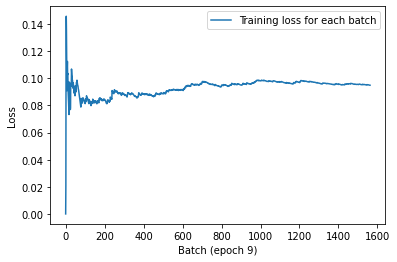

In [20]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [21]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2922 - accuracy: 0.9134 - val_loss: 0.1489 - val_accuracy: 0.9579
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1668 - accuracy: 0.9531 - val_loss: 0.1215 - val_accuracy: 0.9676
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1399 - accuracy: 0.9635 - val_loss: 0.1197 - val_accuracy: 0.9702
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1295 - accuracy: 0.9673 - val_loss: 0.1207 - val_accuracy: 0.9701
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1176 - accuracy: 0.9703 - val_loss: 0.1116 - val_accuracy: 0.9737
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1146 - accuracy: 0.9727 - val_loss: 0.1106 - val_accuracy: 0.9756
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1090 - accuracy: 0.9739 - val_loss: 0.1025 - val_ac

In [23]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10584), started 0:04:22 ago. (Use '!kill 10584' to kill it.)

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)